Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to develop a code that can read PYSYN_CDBS spectrum of a standard object, and convert it into photometric equivalent given observation bandpass. We would like to perform this specifically on GD153 spectrum.

# Previously
We would like to perform contamination removal of the object X01 on GRB 190829A at epochs 201909 and 201910. To do this, we would like to first to check whether X01 is a stable star by using its photometric property. We started to develop HSTPHOT, and would like to apply to GD153 as a test case. However, we need another code to transform GD153's spectral profile into photometric equivalence.

# Resources
- [pysynphot](https://pysynphot.readthedocs.io/en/latest/)


In [1]:
import pysynphot as S

def to_phot(spectrum_wave,spectrum_flux,obsbandpass,
            waveunits='angstrom',fluxunits='flam',name='None',keepneg=False,
            force=None
           ):
    """
    to_phot is a convenient function to compute photometric equivalence given a spectral profile. This routine uses pysynphot.
    - pysynphot.ArraySpectrum(spectrum_wave,spectrum_flux,waveunits,fluxunits,name,keepneg)
    - pysynphot.ObsBandpass(obsbandpass)
      - obsbandpass = 'wfc3,ir,f140w' for example. Note that all lower cases.
    - pysynphot.Observation(ArraySpectrum, ObsBandpass, force)
      - force can be None, 'extrap', or 'taper.' Note: if keepneg = True and there is a negative element in the ArraySpectrum, this will crash.
    The routine returns pysynphot.Observation.
    Use return.efflam() for effective wavelength.
    Use return.effstim('flam') for effective flam.
    """
    spc = S.ArraySpectrum(spectrum_wave,spectrum_flux,waveunits,fluxunits,name,keepneg)
    obs = S.Observation(spc,S.ObsBandpass(obsbandpass),force=force)
    return obs


In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt


In [3]:
filepath = '/Users/kbhirombhakdi/_work/_calib_files/PYSYN_CDBS/calspec/gd153_mod_010.fits'
t = fits.open(filepath)
t.info()


Filename: /Users/kbhirombhakdi/_work/_calib_files/PYSYN_CDBS/calspec/gd153_mod_010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  SCI           1 BinTableHDU     19   174246R x 2C   [1D, 1E]   


In [4]:
spectrum_wave = t[1].data.WAVELENGTH.copy()
spectrum_flux = t[1].data.FLUX.copy()
obsbandpass = 'wfc3,ir,f098m'
t = to_phot(spectrum_wave,spectrum_flux,obsbandpass)


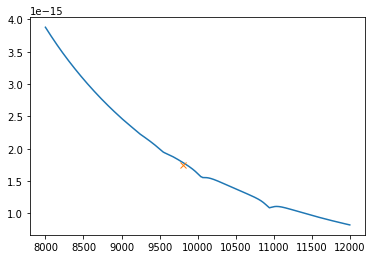

In [5]:
wavebound = (8000.,12000.)
m = np.argwhere((spectrum_wave >= wavebound[0])&(spectrum_wave <= wavebound[1])).flatten()
tx,ty = spectrum_wave[m],spectrum_flux[m]
plt.plot(tx,ty)
plt.plot(t.efflam(),t.effstim('flam'),'x')


# Summary
This Notebook provided to_phot() as a convenient function to compute photometric equivalence given spectral profile. This routine uses pysynphot. An example above showed how the function works.
